In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
%aimport AD_comparison_tools
%aimport AD_predictor_tools
%aimport ADpred_LambertTFs_helper
import protfasta
import matplotlib.pyplot as plt
import seaborn as sns
#import metapredict as meta
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc

from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.lines import Line2D

sns.set_theme(rc={'figure.figsize':(6,4), 'figure.dpi' : 300})
sns.set_style("white")

from parrot import py_predictor

Error importing GPy.
 If trying to run parrot-optimize, make sure to use `pip install idptools-parrot[optimize]`


In [5]:
harmonized_screens = pd.read_csv("../output/harmonized_screens.csv")
harmonized_screens

,Unnamed: 0,seq,z-score,screen
0,0,YYSSLGVEPWDLDGLFEFSRLLVDLNMDGFKIDWDYEVAE,39.863967,controls_syn
1,1,HLDVDLFADVEIDDPPQIDFDEVLSLVDDGQNPSSCVESF,67.641322,controls_syn
2,2,HLDSSNSFDAAASGDSDDDYLFDTSVLRFSNDDDGDLYLK,6.949263,controls_syn
3,3,HLDFPDMFDDALDLDAYDLGSLLSDIDSPMDFKDDMPTNY,49.213636,controls_syn
4,4,HKQSVAPTTLVDLNPIITCYSEWRSTDDLKDLLLEDFIDK,66.502383,controls_syn
...,...,...,...,...
104185,104185,SDFVVKAEDVEASMAIFWTPGTRVKMAMETEDSSRITWFQ,0.730194,padi
104186,104186,EASMAIFWTPGTRVKMAMETEDSSRITWFQGIVFYTYQET,1.022412,padi
104187,104187,GTRVKMAMETEDSSRITWFQGIVFYTYQETGPWRGSPWNS,-0.331438,padi
104188,104188,EDSSRITWFQGIVFYTYQETGPWRGSPWNSFRYKIPFTIP,2.564526,padi


In [61]:
# Yyeast and Human

In [3]:
consensus_predictor = py_predictor.Predictor("../output/parrot_human_yeast_aggreg", 
                                                dtype="residues")


In [ ]:
harmonized_screens["consensus_pred"] = harmonized_screens["seq"].apply(lambda x: np.mean(consensus_predictor.predict(x)))
harmonized_screens

,Unnamed: 0,seq,z-score,screen,consensus_pred
0,0,YYSSLGVEPWDLDGLFEFSRLLVDLNMDGFKIDWDYEVAE,39.863967,controls_syn,0.811492
1,1,HLDVDLFADVEIDDPPQIDFDEVLSLVDDGQNPSSCVESF,67.641322,controls_syn,0.750576
2,2,HLDSSNSFDAAASGDSDDDYLFDTSVLRFSNDDDGDLYLK,6.949263,controls_syn,0.574970
3,3,HLDFPDMFDDALDLDAYDLGSLLSDIDSPMDFKDDMPTNY,49.213636,controls_syn,0.997659
4,4,HKQSVAPTTLVDLNPIITCYSEWRSTDDLKDLLLEDFIDK,66.502383,controls_syn,0.455788
...,...,...,...,...,...
104185,104185,SDFVVKAEDVEASMAIFWTPGTRVKMAMETEDSSRITWFQ,0.730194,padi,0.088036
104186,104186,EASMAIFWTPGTRVKMAMETEDSSRITWFQGIVFYTYQET,1.022412,padi,0.078077
104187,104187,GTRVKMAMETEDSSRITWFQGIVFYTYQETGPWRGSPWNS,-0.331438,padi,0.085898
104188,104188,EDSSRITWFQGIVFYTYQETGPWRGSPWNSFRYKIPFTIP,2.564526,padi,0.072048


In [ ]:
from scipy.stats import pearsonr, spearmanr

sns.scatterplot(data = harmonized_screens, x = "z-score", y = "consensus_pred", alpha = 0.3, edgecolor = 'none', s = 0.1)
# Calculate Pearson and Spearman correlations
pearson_corr, _ = pearsonr(harmonized_screens["z-score"], harmonized_screens["consensus_pred"])
spearman_corr, _ = spearmanr(harmonized_screens["z-score"], harmonized_screens["consensus_pred"])

# Add text annotations to the figure
plt.text(0.05, 0.95, f"Pearson: {pearson_corr:.2f}", transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.text(0.05, 0.90, f"Spearman: {spearman_corr:.2f}", transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

# Print correlations
print(f"Pearson Correlation: {pearson_corr}")
print(f"Spearman Correlation: {spearman_corr}")

In [31]:
sampled_harmonized_screens = harmonized_screens.sample(n=10000, random_state=42)
sampled_harmonized_screens

,Unnamed: 0,seq,z-score,screen,consensus_pred
50164,50164,QEPTKLTPWRNNHWRVQSLGNHPVAINNGSGPGIPFPGKF,0.758006,padi,0.019014
42266,42266,LRALSHSFVSSLPPETSTDTMSNQKQSNTYHFSSDKILKP,-0.650992,padi,0.012088
46852,46852,MGLVSSRVPLPHHIQENEPIFVNAKQYHAILRRRKHRAKL,0.739616,padi,0.004935
89333,89333,SPFPLSIQSNSFFSPVIAGNPVPQFHARVASSEAVEPSPS,-0.580584,padi,0.050236
34569,34569,GVSSRKRDKPLPPIVVEDPSDTVAMKRARNTLAARKSRER,0.578423,gcn4,-0.001404
...,...,...,...,...,...
48815,48815,NLSQSTCMIRVLKDLKKIVDEKAIQLIHQTNPNFYVGSSS,0.457706,padi,0.013919
40307,40307,EDMSILISTYEGTHNHPLPMSATAMASATSAAASMLLSGA,0.811219,padi,0.055680
59641,59641,PADANTKPIIMELAFGAMEELLVMAQVAEPLWMGGFNGTS,12.962415,padi,0.312530
100708,100708,TKATDVVISEPEIWPKDETKVRAIIRKYKDTVSTSCRKET,0.199726,padi,0.017675


In [35]:
sampled_harmonized_screens["consensus_pred_avg"] = sampled_harmonized_screens["seq"].apply(lambda x: np.mean(consensus_predictor.predict(x)))
sampled_harmonized_screens

,Unnamed: 0,seq,z-score,screen,consensus_pred,consensus_pred_sum,consensus_pred_avg
50164,50164,QEPTKLTPWRNNHWRVQSLGNHPVAINNGSGPGIPFPGKF,0.758006,padi,0.019014,0.760558,0.019014
42266,42266,LRALSHSFVSSLPPETSTDTMSNQKQSNTYHFSSDKILKP,-0.650992,padi,0.012088,0.483510,0.012088
46852,46852,MGLVSSRVPLPHHIQENEPIFVNAKQYHAILRRRKHRAKL,0.739616,padi,0.004935,0.197387,0.004935
89333,89333,SPFPLSIQSNSFFSPVIAGNPVPQFHARVASSEAVEPSPS,-0.580584,padi,0.050236,2.009421,0.050236
34569,34569,GVSSRKRDKPLPPIVVEDPSDTVAMKRARNTLAARKSRER,0.578423,gcn4,-0.001404,-0.056178,-0.001404
...,...,...,...,...,...,...,...
48815,48815,NLSQSTCMIRVLKDLKKIVDEKAIQLIHQTNPNFYVGSSS,0.457706,padi,0.013919,0.556756,0.013919
40307,40307,EDMSILISTYEGTHNHPLPMSATAMASATSAAASMLLSGA,0.811219,padi,0.055680,2.227197,0.055680
59641,59641,PADANTKPIIMELAFGAMEELLVMAQVAEPLWMGGFNGTS,12.962415,padi,0.312530,12.501185,0.312530
100708,100708,TKATDVVISEPEIWPKDETKVRAIIRKYKDTVSTSCRKET,0.199726,padi,0.017675,0.707010,0.017675


In [33]:
sampled_harmonized_screens["consensus_pred_sum"] = sampled_harmonized_screens["seq"].apply(lambda x: np.sum(consensus_predictor.predict(x)))
sampled_harmonized_screens

,Unnamed: 0,seq,z-score,screen,consensus_pred,consensus_pred_sum
50164,50164,QEPTKLTPWRNNHWRVQSLGNHPVAINNGSGPGIPFPGKF,0.758006,padi,0.019014,0.760558
42266,42266,LRALSHSFVSSLPPETSTDTMSNQKQSNTYHFSSDKILKP,-0.650992,padi,0.012088,0.483510
46852,46852,MGLVSSRVPLPHHIQENEPIFVNAKQYHAILRRRKHRAKL,0.739616,padi,0.004935,0.197387
89333,89333,SPFPLSIQSNSFFSPVIAGNPVPQFHARVASSEAVEPSPS,-0.580584,padi,0.050236,2.009421
34569,34569,GVSSRKRDKPLPPIVVEDPSDTVAMKRARNTLAARKSRER,0.578423,gcn4,-0.001404,-0.056178
...,...,...,...,...,...,...
48815,48815,NLSQSTCMIRVLKDLKKIVDEKAIQLIHQTNPNFYVGSSS,0.457706,padi,0.013919,0.556756
40307,40307,EDMSILISTYEGTHNHPLPMSATAMASATSAAASMLLSGA,0.811219,padi,0.055680,2.227197
59641,59641,PADANTKPIIMELAFGAMEELLVMAQVAEPLWMGGFNGTS,12.962415,padi,0.312530,12.501185
100708,100708,TKATDVVISEPEIWPKDETKVRAIIRKYKDTVSTSCRKET,0.199726,padi,0.017675,0.707010


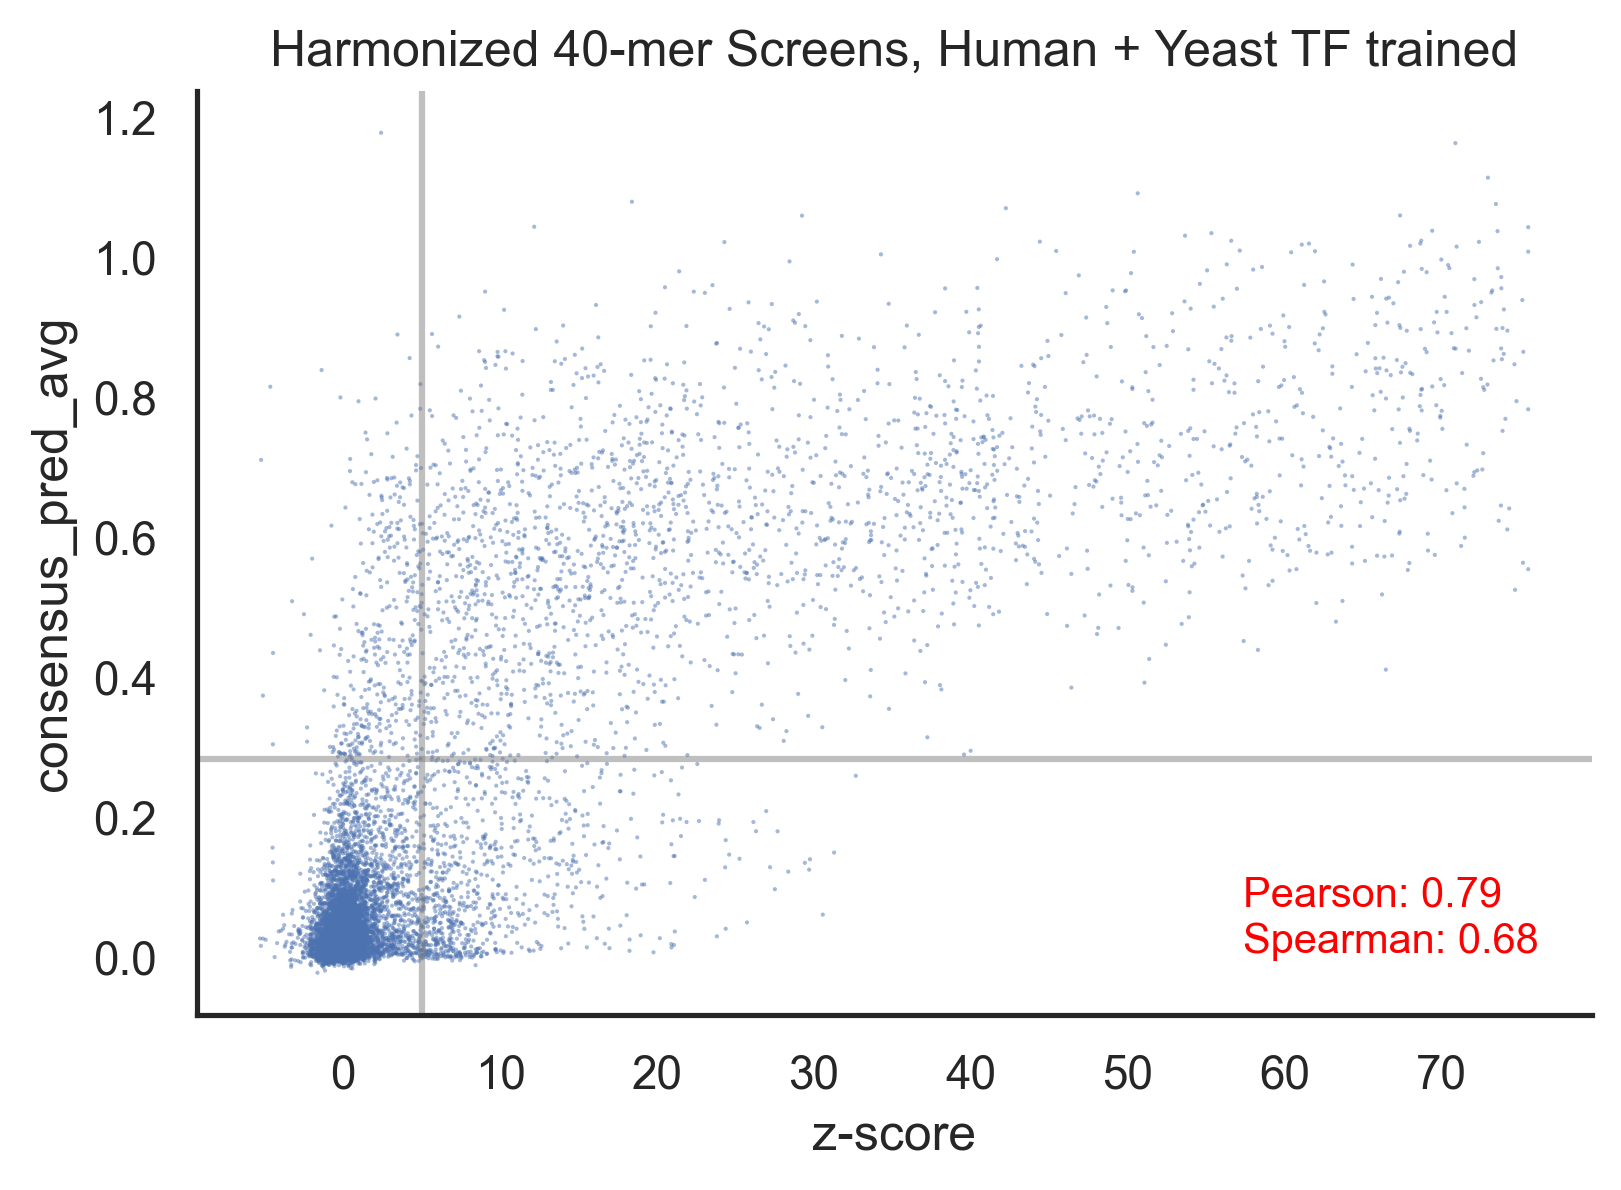

In [74]:
from scipy.stats import pearsonr, spearmanr

sns.scatterplot(data = sampled_harmonized_screens, x = "z-score", y = "consensus_pred_avg", alpha = 0.5, edgecolor = 'none', s = 1)
# Calculate Pearson and Spearman correlations
pearson_corr, _ = pearsonr(sampled_harmonized_screens["z-score"], sampled_harmonized_screens["consensus_pred_avg"])
spearman_corr, _ = spearmanr(sampled_harmonized_screens["z-score"], sampled_harmonized_screens["consensus_pred_avg"])

# Add text annotations to the figure
plt.text(0.75, 0.15, f"Pearson: {pearson_corr:.2f}", transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', color = 'red')
plt.text(0.75, 0.10, f"Spearman: {spearman_corr:.2f}", transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', color = 'red')

plt.axvline(5, color = 'gray', alpha = 0.5)
plt.axhline(0.2837, color = 'gray', alpha = 0.5)

plt.title("Harmonized 40-mer Screens, Human + Yeast TF trained")
sns.despine()

In [62]:
# Human

In [63]:
human_predictor = py_predictor.Predictor("../output/parrot_lambert_tf_aggreg_preds_output", dtype = 'residues')

In [64]:
sampled_harmonized_screens["human_consensus_pred_avg"] = sampled_harmonized_screens["seq"].apply(lambda x: np.mean(human_predictor.predict(x)))
sampled_harmonized_screens

,Unnamed: 0,seq,z-score,screen,consensus_pred,consensus_pred_sum,consensus_pred_avg,human_consensus_pred_avg
50164,50164,QEPTKLTPWRNNHWRVQSLGNHPVAINNGSGPGIPFPGKF,0.758006,padi,0.019014,0.760558,0.019014,0.021622
42266,42266,LRALSHSFVSSLPPETSTDTMSNQKQSNTYHFSSDKILKP,-0.650992,padi,0.012088,0.483510,0.012088,0.017737
46852,46852,MGLVSSRVPLPHHIQENEPIFVNAKQYHAILRRRKHRAKL,0.739616,padi,0.004935,0.197387,0.004935,0.011332
89333,89333,SPFPLSIQSNSFFSPVIAGNPVPQFHARVASSEAVEPSPS,-0.580584,padi,0.050236,2.009421,0.050236,0.065331
34569,34569,GVSSRKRDKPLPPIVVEDPSDTVAMKRARNTLAARKSRER,0.578423,gcn4,-0.001404,-0.056178,-0.001404,0.006033
...,...,...,...,...,...,...,...,...
48815,48815,NLSQSTCMIRVLKDLKKIVDEKAIQLIHQTNPNFYVGSSS,0.457706,padi,0.013919,0.556756,0.013919,0.016984
40307,40307,EDMSILISTYEGTHNHPLPMSATAMASATSAAASMLLSGA,0.811219,padi,0.055680,2.227197,0.055680,0.038575
59641,59641,PADANTKPIIMELAFGAMEELLVMAQVAEPLWMGGFNGTS,12.962415,padi,0.312530,12.501185,0.312530,0.314237
100708,100708,TKATDVVISEPEIWPKDETKVRAIIRKYKDTVSTSCRKET,0.199726,padi,0.017675,0.707010,0.017675,0.028655


In [67]:
sampled_harmonized_screens["screen"].value_counts()

screen
padi            6547
gcn4            1758
controls_syn    1695
Name: count, dtype: int64

In [69]:
harmonized_screens["screen"].value_counts()

screen
padi            68458
gcn4            18462
controls_syn    17270
Name: count, dtype: int64

In [70]:
sampled_harmonized_screens[sampled_harmonized_screens["screen"] == "controls_syn"]

,Unnamed: 0,seq,z-score,screen,consensus_pred,consensus_pred_sum,consensus_pred_avg,human_consensus_pred_avg
9900,9900,SFMRENNDLESHEFLQFFQEDLEAFPDDDYTSYWSMFGDW,70.433804,controls_syn,0.989225,39.568993,0.989225,0.958448
9998,9998,SATATTTVQNPSWMDEFLDFSEGDWDLDGLNLEELRDAMD,44.493809,controls_syn,0.856099,34.243946,0.856099,0.833443
12000,12000,TQRVPYFSSDQGSNSFDAGGGDFEFSEFLDFSDVENDEGG,41.454789,controls_syn,0.651620,26.064804,0.651620,0.673424
8021,8021,EDDGFQSSVYSLDDIDSLFQLFDTVTNSLIDPYTHNLLGE,59.697779,controls_syn,0.688552,27.542099,0.688552,0.641942
14885,14885,MGPDSLDLLVDFSNDDDENIFPFFSALDDLLNFSVPEEEE,69.709259,controls_syn,0.922310,36.892403,0.922310,0.925177
...,...,...,...,...,...,...,...,...
9783,9783,SDSGESTLFDDHVWDGKNSYEELVDEVDFDDSQDWASLDD,16.633886,controls_syn,0.837999,33.519974,0.837999,0.832142
5052,5052,DTVGWWLVDLHDGMLSLEAKITWLDIPSFVDVVDAVDVFR,13.060576,controls_syn,0.509461,20.378428,0.509461,0.614082
1575,1575,FSVDDFSVDDFSVDDFSVDDLLDFSNDDDEEFLGFNNNEW,70.896440,controls_syn,1.163577,46.543079,1.163577,1.054094
6545,6545,ETLEKFSWTDDIFLQNPDPSCSGCGDTFLNGWLLKPDLGQ,43.607754,controls_syn,0.575553,23.022123,0.575553,0.620582


Text(0.5, 1.0, 'Harmonized 40-mer Screens, Human TF Trained')

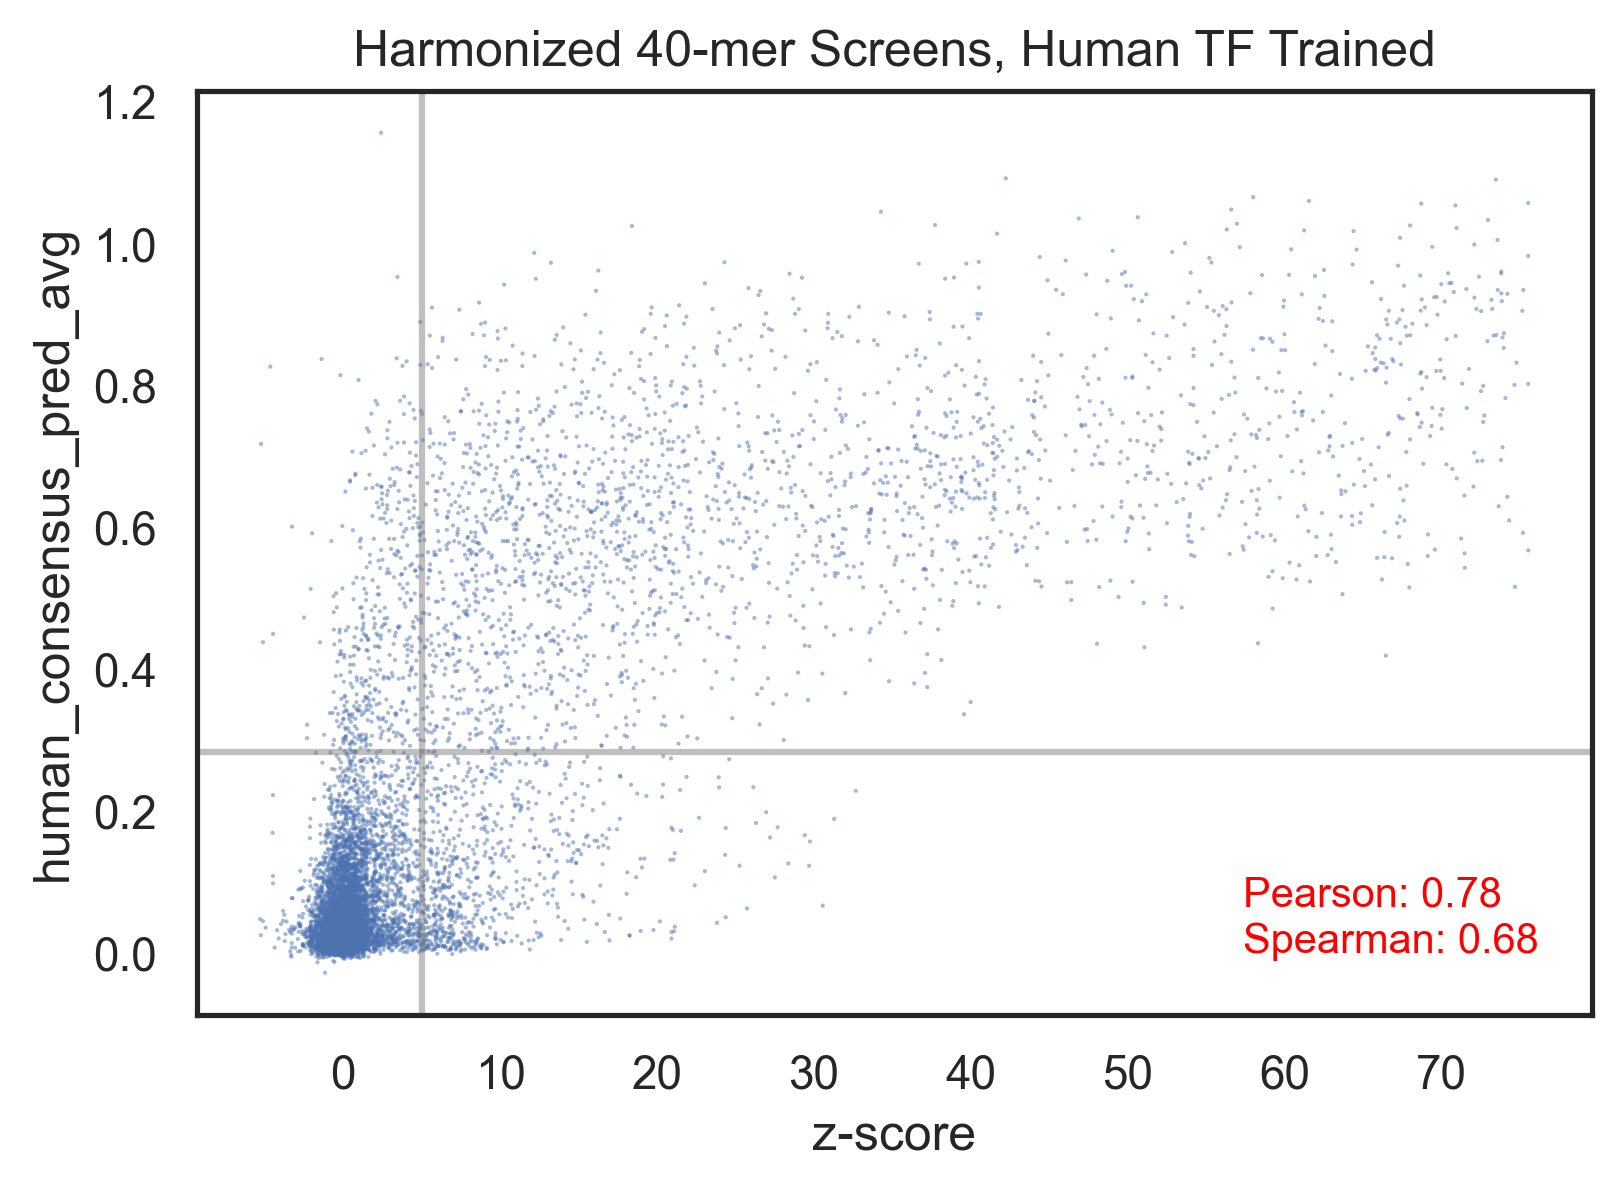

In [75]:
from scipy.stats import pearsonr, spearmanr

sns.scatterplot(data = sampled_harmonized_screens, x = "z-score", y = "human_consensus_pred_avg", alpha = 0.5, edgecolor = 'none', s = 1)
# Calculate Pearson and Spearman correlations
pearson_corr, _ = pearsonr(sampled_harmonized_screens["z-score"], sampled_harmonized_screens["human_consensus_pred_avg"])
spearman_corr, _ = spearmanr(sampled_harmonized_screens["z-score"], sampled_harmonized_screens["human_consensus_pred_avg"])

# Add text annotations to the figure
plt.text(0.75, 0.15, f"Pearson: {pearson_corr:.2f}", transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', color = 'red')
plt.text(0.75, 0.10, f"Spearman: {spearman_corr:.2f}", transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', color = 'red')

plt.axvline(5, color = 'gray', alpha = 0.5)
plt.axhline(0.2837, color = 'gray', alpha = 0.5)

plt.title("Harmonized 40-mer Screens, Human TF Trained")